<br>
  <a href="https://colab.research.google.com/drive/1ggpv7mcUrWlqviFwd2gQTIf7_9rngW1U?usp=sharing"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
<br>

此notebook由Stanford CS231n 課程筆記[Python Numpy Tutorial](https://cs231n.github.io/python-numpy-tutorial/) 演繹而來，原作者為[Justin Johnson](http://cs.stanford. edu/people/jcjohns/)，譯者為[杜客](https://zhuanlan.zhihu.com/p/20878530), 我也在原有內容的基礎上進行了修改，將此切成兩部分，一個為基礎的Python，一個為 Numpy,Matplotlib,Seaborn,Pandas入門。

# 1.Numpy 快速入門

Numpy 是 Python 中用於科學計算的核心函式庫。 它提供了高效能的多維數組對象，以及相關工具。

In [4]:
import numpy as np

## 數組(Arrays)

一個 Numpy 陣列是一個由不同數值組成的網格。 網格中的資料都是同一種資料類型，可以透過非負整數數的元組來存取。 維度的數量稱為數組的階，數組的大小是由整數型數構成的元組，可以描述數組不同維度上的大小。

我們可以從清單建立數組，然後利用方括號存取其中的元素：

In [ ]:
a = np.array([1, 2, 3]) # 建立秩為 1 的數組，即向量
print(type(a)) # 輸出 "<class 'numpy.ndarray'>"
print(a.shape) # 輸出 "(3,)"
print(a[0], a[1], a[2]) # 輸出 "1 2 3"
a[0] = 5 # 改變陣列中的元素
print(a) # 輸出 "[5, 2, 3]"

b = np.array([[1,2,3],[4,5,6]]) # 建立秩為 2 的數組，即矩陣
print(b) # 輸出矩陣 b
print(b.shape) # 輸出 "(2, 3)"
print(b[0, 0], b[0, 1], b[1, 0]) # 輸出 "1 2 4"

<class 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]
[[1 2 3]
 [4 5 6]]
(2, 3)
1 2 4


Numpy 也提供了許多其他建立陣列的方法：

In [ ]:
a = np.zeros((2,2)) # 建立元素全為 0 的陣列
print(a) # 輸出 "[[ 0. 0.]
                      # [ 0. 0.]]"

b = np.ones((1,2)) # 建立元素全為 1 的陣列
print(b) # 輸出 "[[ 1. 1.]]"

c = np.full((2,2), 7) # 建立一個常數數組
print(c) # 輸出 "[[ 7. 7.]
                       # [ 7. 7.]]"

d = np.eye(2) # 建立一個 2x2 單位矩陣
print(d) # 輸出 "[[ 1. 0.]
                      # [ 0. 1.]]"

e = np.random.random((2,2)) # 建立一個包含隨機值的陣列
print(e) # 可能輸出 "[[ 0.91940167 0.08143941]
                             # [ 0.68744134 0.87236687]]"

[[0. 0.]
 [0. 0.]]
[[1. 1.]]
[[7 7]
 [7 7]]
[[1. 0.]
 [0. 1.]]
[[0.82699825 0.67049008]
 [0.69272684 0.4047515 ]]


### 存取數組
Numpy 提供了多種存取陣列的方法。

**切片：**和 Python 清單類似，Numpy 陣列可以使用切片語法。 因為陣列可以是多維的，所以你必須為每個維度指定好切片。

In [ ]:
# 建立形狀為 (3, 4) 的秩為 2 的數組，如下所示
# [[ 1 2 3 4]
# [ 5 6 7 8]
# [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# 使用切片來提取由前兩行和索引為 1,2 列組成的子數組
# b 是形狀為 (2, 2) 的數組，如下圖所示
# [[2 3]
# [6 7]]
b = a[:2, 1:3]

# 數組的一個切片是指向相同資料的視圖，因此如果修改它
# 也會修改原始數組
print(a[0, 1]) # 輸出 "2"
b[0, 0] = 77 # b[0, 0] 和 a[0, 1] 位置的數據一致
print(a[0, 1]) # 輸出 "77"

2
77


你可以同時使用整數和切片語法來存取陣列。 但是，這樣做會產生一個比原始數組低階的新數組。

In [ ]:
# 建立形狀為 (3, 4) 的秩為 2 的數組，如下所示
# [[ 1 2 3 4]
# [ 5 6 7 8]
# [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# 存取數組中行資料的兩種方法。
# 將整數索引和切片混合在一起會得到一個較低階的陣列，
# 只使用切片時，將產生與原始陣列相同秩的陣列:
row_r1 = a[1, :] # 秩為 1 的 a 的第二行的視圖
row_r2 = a[1:2, :] # 秩為 2 的 a 的第二行的視圖
print(row_r1, row_r1.shape) # 輸出 "[5 6 7 8] (4,)"
print(row_r2, row_r2.shape) # 輸出 "[[5 6 7 8]] (1, 4)"

# 我們可以在存取陣列的列時做同樣的區分:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape) # 輸出 "[ 2 6 10] (3,)"
print(col_r2, col_r2.shape) # 輸出 "[[ 2]
                             # [ 6]
                             # [10]] (3, 1)"

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


**整數陣列存取：**當我們使用切片語法存取數組時，得到的總是原始數組的子集。 整數數組存取允許我們利用其它數組的資料來建立一個新的數組：

In [ ]:
a = np.array([[1,2], [3, 4], [5, 6]])

# 整數陣列索引的一個例子。
# 傳回的陣列將具有 (3,) 並輸出 "[1 4 5]"
print(a[[0, 1, 2], [0, 1, 0]])

# 上面的整數陣列索引範例與此等價:
print(np.array([a[0, 0], a[1, 1], a[2, 0]])) # 輸出 "[1 4 5]"

# 使用整數陣列索引時，可以重複使用原數組中的相同元素:
print(a[[0, 0], [1, 1]]) # Prints "[2 2]"

# 等價於前面的整數數組索引範例
print(np.array([a[0, 1], a[0, 1]])) # Prints "[2 2]"

[1 4 5]
[1 4 5]
[2 2]
[2 2]


整數陣列存取語法還有個有用的技巧，可以用來選擇或更改矩陣中每行中的一個元素：

In [ ]:
# 建立一個新數組，從中選擇元素
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])

print(a) # 輸出 "array([[ 1, 2, 3],
          # [ 4, 5, 6],
          # [ 7, 8, 9],
          # [10, 11, 12]])"

# 建立索引數組
b = np.array([0, 2, 0, 1])

# 使用 b 中的索引從 a 的每一行中選擇一個元素
print(a[np.arange(4), b]) # 輸出 "[ 1 6 7 11]"

# 使用 b 中的索引從 a 的每一行修改一個元素
a[np.arange(4), b] += 10

print(a) # 輸出 "array([[11, 2, 3],
          # [ 4, 5, 16],
          # [17, 8, 9],
          #  [10, 21, 12]])

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[ 1  6  7 11]
[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


**布林型陣列存取：**布林型陣列存取可以讓你選擇陣列中任意元素。 通常，這種存取方式用於選取數組中滿足某些條件的元素，舉例如下：

In [ ]:
a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2) # 求 a 中大於 2 的元素;
                     # 這將傳回布林值表示的 Numpy 數組
                     # 形狀和 a 相同, bool_idx 每個槽表示對應 a 的元素是否 > 2

print(bool_idx) # 輸出 "[[False False]
                     # [ True True]
                     # [ 真 True]]"

# 我們使用布林數組索引來建構一個秩為 1 的數組
# 由對應於 bool_idx 的真值的 a 的元素組成
print(a[bool_idx]) # 輸出 "[3 4 5 6]"

# 我們可以用一個簡潔的聲明做到同樣的效果:
print(a[a > 2]) # 輸出 "[3 4 5 6]"

[[False False]
 [ True  True]
 [ True  True]]
[3 4 5 6]
[3 4 5 6]


### 資料類型
每個 Numpy 陣列都是由資料類型相同的元素組成的網格。 Numpy 提供了許多的資料類型用於建立數組。 當你建立數組的時候，Numpy 會試著猜測數組的資料類型，你也可以透過參數直接指定資料類型，範例如下：

In [ ]:
x = np.array([1, 2]) # 讓 Numpy 選擇資料類型
print(x.dtype) # 輸出 "int64"

x = np.array([1.0, 2.0]) # 讓 Numpy 選擇資料類型
print(x.dtype) # 輸出 "float64"

x = np.array([1, 2], dtype=np.int64) # 強制使用特定的資料型別
print(x.dtype) # 輸出 "int64"

int64
float64
int64


### 數組計算
基本數學計算函數會對數組中元素逐一計算，既可以利用運算元重載，也可以使用函數方式：

In [ ]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# 元素間求和；均會產生數組
# [[ 6.0 8.0]
# [10.0 12.0]]
print(x + y)
print(np.add(x, y))

# 元素間求差；都會產生數組
# [[-4.0 -4.0]
# [-4.0 -4.0]]
print(x - y)
print(np.subtract(x, y))

# 元素間乘法；都會產生數組
# [[ 5.0 12.0]
# [21.0 32.0]]
print(x * y)
print(np.multiply(x, y))

# 元素間除法；都會產生數組
# [[ 0.2 0.33333333]
# [ 0.42857143 0.5 ]]
print(x / y)
print(np.divide(x, y))

# 元素開根 ；產生數組
# [[ 1. 1.41421356]
# [ 1.73205081 2. ]]
print(np.sqrt(x))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]
[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[1.         1.41421356]
 [1.73205081 2.        ]]


在 Numpy 中使用 dot 來進行矩陣乘法：

In [ ]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# 向量內積; 都會產生 219
print(v.dot(w))
print(np.dot(v, w))

# 矩陣 / 向量乘積; 皆會產生秩為 1 的陣列 [29 67]
print(x.dot(v))
print(np.dot(x, v))

# 矩陣 / 向量乘積; 皆會產生秩為 2 的陣列
# [[19 22]
# [43 50]]
print(x.dot(y))
print(np.dot(x, y))

219
219
[29 67]
[29 67]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy 提供了許多計算數組的函數，其中最常用的一個是 `sum`：

In [ ]:
x = np.array([[1,2],[3,4]])

print(np.sum(x)) # 計算所有元素的和; 輸出 "10"
print(np.sum(x, axis=0)) # 計算每一列的和; 輸出 "[4 6]"
print(np.sum(x, axis=1)) # 計算每一行的和; 輸出 "[3 7]"

10
[4 6]
[3 7]


除了計算，我們也常常改變數組或操作其中的元素。 其中將矩陣轉置是常用的一個，在 Numpy 中，使用 `T` 來轉置矩陣：

In [ ]:
x = np.array([[1,2], [3,4]])
print(x) # 輸出 "[[1 2]
             # [3 4]]"
print(x.T) # 輸出 "[[1 3]
             # [2 4]]"

# 注意，將一個秩為 1 的陣列轉置沒有任何作用:
v = np.array([1,2,3])
print(v) # 輸出 "[1 2 3]"
print(v.T) # 輸出 "[1 2 3]"

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[1 2 3]
[1 2 3]


## 廣播(Broadcasting)

廣播是一種強而有力的機制，它讓 Numpy 可以讓不同大小的矩陣在一起進行數學計算。 我們常常會有一個小的矩陣和一個大的矩陣，然後我們會需要用小的矩陣對大的矩陣做一些計算。

舉個例子，如果我們想要把一個向量加到矩陣的每一行，我們可以這樣做：

In [ ]:
# 我們將向量 v 加到矩陣 x 的每一行
# 將結果儲存在矩陣 y 中
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x) # 建立一個形狀與 x 相同的空矩陣

# 用顯式迴圈將向量 v 加到矩陣 x 的每一行
for i in range(4):
     y[i, :] = x[i, :] + v

# 現在矩陣 y 如下所示
# [[ 2 2 4]
# [ 5 5 7]
# [ 8 8 10]
# [11 11 13]]
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


這樣是行得通的，但是當 x 矩陣非常大，利用迴圈來計算就會變得很慢很慢。 我們可以換一種思路：

In [ ]:
# 我們將向量 v 加到矩陣 x 的每一行
# 將結果儲存在矩陣 y 中
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
vv = np.tile(v, (4, 1)) # 將 4 行 v 向量疊在一起
print(vv) # 輸出 "[[1 0 1]
                          # [1 0 1]
                          # [1 0 1]
                          # [1 0 1]]"
y = x + vv # x 和 vv 元素間相加
print(y) # 輸出 "[[ 2 2 4
           # [ 5 5 7]
           # [ 8 8 10]
           # [11 11 13]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy 廣播機制可以讓我們不用建立 vv，就能直接運算，看看下面範例：

In [ ]:
# 我們將向量 v 加到矩陣 x 的每一行
# 將結果儲存在矩陣 y 中
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v # 使用廣播將 v 加到 x 的每一行
print(y) # 輸出 "[[ 2 2 4]
          # [ 5 5 7]
          # [ 8 8 10]
          # [11 11 13]]"

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


對兩個陣列使用廣播機制要遵守下列規則：

1. 如果陣列的秩不同，使用1來將秩較小的陣列進行擴展，直到兩個陣列的尺寸的長度都一樣。
2. 如果兩個數組在某個維度上的長度是一樣的，或者其中一個數組在該維度上長度為1，那麼我們就說這兩個數組在該維度上是相容的。
3. 如果兩個陣列在所有維度上都是相容的，他們就能使用廣播。
4. 如果兩個輸入陣列的尺寸不同，那麼請注意其中較大的尺寸。 因為廣播之後，兩個陣列的尺寸將會和那個較大的尺寸一樣。
5. 在任何一個維度上，如果一個數組的長度為1，另一個數組長度大於1，那麼在該維度上，就好像是對第一個數組進行了複製。

如果上述解釋看不明白，可以讀一讀[文檔](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)和這個[解釋](http://scipy.github.io/old-wiki/pages/EricsBroadcastingDoc)。 譯者註：強烈建議閱讀文檔中的例子。

支援廣播機制的函數是全域函數。 哪些是全域函數可以在[文檔](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs)中找到。

In [ ]:
# 計算向量的外積
v = np.array([1,2,3]) # v 形狀為 (3,)
w = np.array([4,5]) # w 形狀為 (2,)
# 為了計算一個外積，我們先將 v 改為形狀為 (3, 1) 的列
# 然後我們可以對 w 進行廣播，得到形狀 (3,2) 的外積輸出:
# [[ 4 5]
# [ 8 10]
# [12 15]]
print(np.reshape(v, (3, 1)) * w)

# 為矩陣的每一行加上向量
x = np.array([[1,2,3], [4,5,6]])
# x 形狀為 (2, 3), v 形狀為 (3,) 將會廣播為 (2, 3)
# 得到下面的矩陣
# [[2 4 6]
# [5 7 9]]
print(x + v)

# 為矩陣的每一列加上向量
# x 形狀為 (2, 3), w 形狀為 (2,).
# 如果將 x 轉置得到形狀 (3, 2) 並讓 w 廣播為 (3, 2) 形狀

# 將結果再轉置得到形狀 (2, 3) 也就是矩陣 x加上每一列向量 w
# 得到如下矩陣:
# [[ 5 6 7]
# [ 9 10 11]]
print((x.T + w).T)

# 另一個解是將 w 重塑為形狀 (2,1)的行向量
# 然後我們可以直接對 x 進行廣播，以產生相同的輸出
print(x + np.reshape(w, (2, 1)))

# 將一個矩陣乘以一個常數:
# x 形狀為 (2, 3). Numpy將標量視為形狀為 () 的陣列
# 這些可以一起廣播以形成 (2, 3)
# 結果如下所示:
# [[ 2 4 6]
# [ 8 10 12]]
print(x * 2)

[[ 4  5]
 [ 8 10]
 [12 15]]
[[2 4 6]
 [5 7 9]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 2  4  6]
 [ 8 10 12]]


廣播機制能讓你的程式碼更簡潔更迅速，能夠用的時候請盡量使用！

## Numpy 和 SciPy 文檔

這篇教學涉及了你需要了解的 Numpy 中的一些重要內容，但是 Numpy遠不止如此。 可以查閱 Numpy [文獻](http://docs.scipy.org/doc/numpy/reference/)來學習更多。

Numpy 提供了高效能的多維數組，以及計算和操作數組的基本工具。 [SciPy](http://docs.scipy.org/doc/scipy/reference/) 基於 Numpy，提供了大量的計算和操作數組的函數，這些函數對於不同類型的科學和工程計算非常有用。

熟悉 SciPy 最好的方法就是閱讀[文件](http://docs.scipy.org/doc/scipy/reference/index.html)。 我們會強調對於本課程有用的部分。

# Matplotlib 快速入門

Matplotlib 是一個作圖庫。 這裡簡單介紹 `matplotlib.pyplot` 模組，功能和 MATLAB 的作圖功能類似。

In [5]:
import matplotlib.pyplot as plt

# 在 notebook 中使用這條指令，則不需要 plt.show()
%matplotlib inline

## 繪圖

`matplotlib` 函式庫中最重要的函數是 `Plot`.該函數允許你做出 2D 圖形，如下：

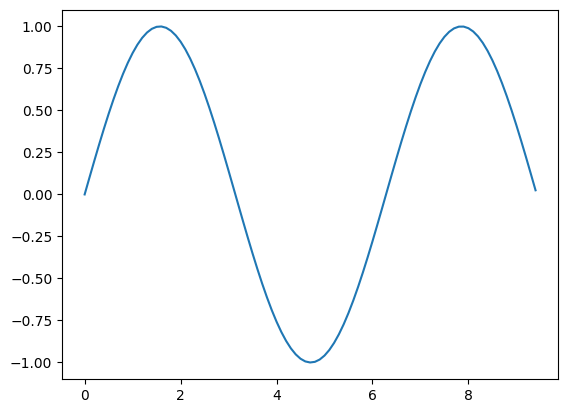

In [6]:
# 計算正弦曲線上點的 x 和 y 座標
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# 使用 matplotlib 繪製這些點
plt.plot(x, y)
plt.show() # 如果沒有上面的指令，必須呼叫 plt.show()才能顯示圖形

只需要少量工作，就可以一次畫不同的線，加上標籤，座標軸標誌等。

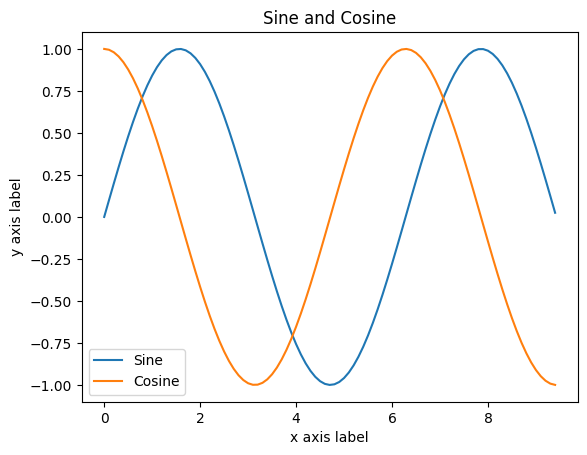

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 計算正弦曲線上點的 x 和 y 座標
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# 使用 matplotlib 繪製這些點
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

可以在[文件](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)中閱讀更多關於 `plot` 的內容。

## 繪製多個影像
可以使用 `subplot` 函數來畫一幅圖中不同的東西：

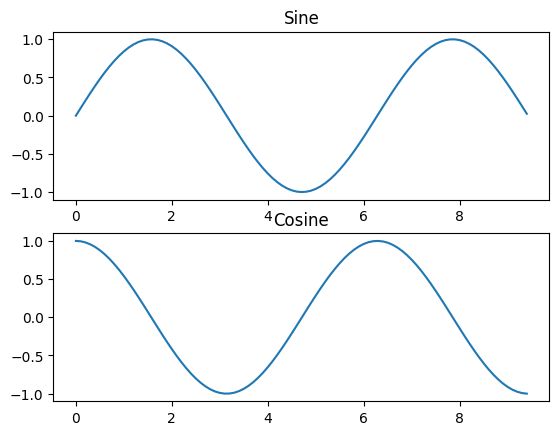

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 計算正弦和餘弦曲線上點的 x 和 y 座標
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# 建立一個高度為 2，寬度為 1 的子圖網格
# 並將第一個子圖設為啟動狀態
plt.subplot(2, 1, 1)

# 繪製第一張圖
plt.plot(x, y_sin)
plt.title('Sine')

# 將第二個子圖設為啟動狀態，並繪製第二張圖
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# 顯示影像
plt.show()

關於 `subplot` 的更多細節，可以閱讀[文件](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot)。

## 圖片

你可以使用 `imshow` 函數來顯示圖像，如下所示：

<ipython-input-16-6a9db439a4c7>:19: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('shibe.jpg')
<ipython-input-16-6a9db439a4c7>:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


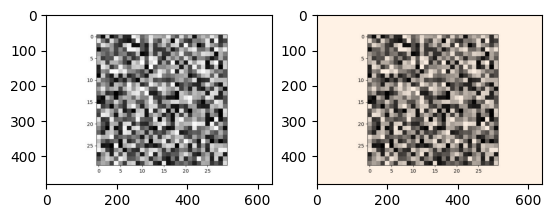

In [16]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

%matplotlib inline

# 產生一些隨機的資料
data = np.random.rand(30, 30)

# 創建一個圖形和一個軸
fig, ax = plt.subplots()

# 展示圖像
ax.imshow(data, cmap='gray')

# 存成 JPG 檔
plt.savefig('shibe.jpg')

img = imageio.imread('shibe.jpg')
img_tinted = img * [1, 0.95, 0.9]

# 顯示原圖
plt.subplot(1, 2, 1)
plt.imshow(img)

# 顯示著色圖
plt.subplot(1, 2, 2)

# imshow 的一個小問題是，它可能會給出奇怪的結果
# 如果顯示的資料不是 uint8 類型，我們在顯示影像之前明確地將其轉換為 uint8
plt.imshow(np.uint8(img_tinted))
plt.show()

# 進階學習

透過閱讀文檔，大家對於 Python / Numpy / Matplotlib 都有了一定掌握。
假設你完成了上面的教程，則已經能夠進行後續課程的學習，遇到陌生的問題時再去查閱文檔或利用搜尋引擎。

## Python 內部機制
我們可以思考一些有趣的現象，你可以猜測下面程式碼的輸出會是什麼。 (它們和課程無關，只是為了培養你的好奇心)
這些是從 [What the f\*ck Python!](https://github.com/satwikkansal/wtfpython) 計畫中挑選出來的一些測驗題：

In [17]:
a = "some_string"
print(id(a))
print(id("some" + "_" + "string"))

132956109985072
132956109985072


In [18]:
some_dict = {}
some_dict[5.5] = "Ruby"
some_dict[5.0] = "JavaScript"
some_dict[5] = "Python"

print(some_dict[5.5])
print(some_dict[5.0])
print(some_dict[5])

Ruby
Python
Python


In [19]:
print('something' is not None)
print('something' is (not None))

True
False


<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-19-51e4554a94ba>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  print('something' is not None)
<ipython-input-19-51e4554a94ba>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
  print('something' is (not None))


## Numpy: 對 Axis 的理解

文章出處：https://zhuanlan.zhihu.com/p/31275071
由於原文中有圖示，建議參考原文進行程式碼練習，以加深理解。

### Axis 就是陣列層級

要理解 `axis`，首先我們要先弄清楚 「Numpy中數組的維數」 和 "線性代數中矩陣的維數" 這兩個概念以及它們之間的關係。 在數學或物理的概念中，`dimensions` 被認為是在空間中表示一個點所需要的最少坐標個數，但是在 Numpy 中，`dimensions` 指代的是數組的維數。 比如下面這個例子：

In [20]:
import numpy as np
a = np.array([[1,2,3],[2,3,4],[3,4,9]])
print(a)

[[1 2 3]
 [2 3 4]
 [3 4 9]]


# 2.Pandas 快速入門

Pandas是用於資料操縱和分析的Python軟體庫。它建造在NumPy基礎上，並為操縱數值表格和時間序列，提供了資料結構和運算操作。

0     John
1     Mary
2    Peter
Name: Name, dtype: object
    Name  Age
0   John   25
1   Mary   30
2  Peter   28
   Name  Age
0  John   25
1  Mary   30
John
            Age
count   2.00000
mean   29.50000
std     2.12132
min    28.00000
25%    28.75000
50%    29.50000
75%    30.25000
max    31.00000


<ipython-input-1-db1731f70135>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][1] = 31


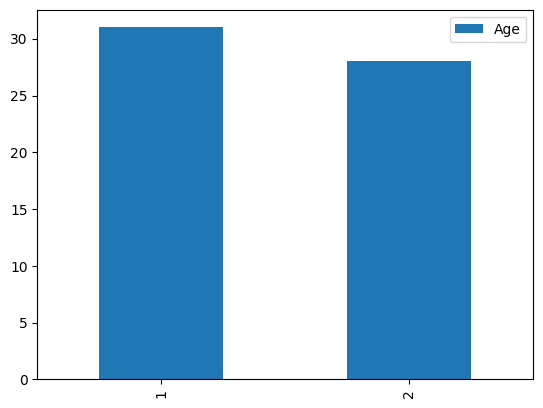

In [1]:
# Pandas 的各種案例教學

import pandas as pd
import matplotlib.pyplot as plt
# 1. 創建 DataFrame
df = pd.DataFrame({'Name': ['John', 'Mary', 'Peter'], 'Age': [25, 30, 28]})

# 2. 訪問 DataFrame 的數據
print(df['Name'])
print(df[['Name', 'Age']])

# 3. 訪問 DataFrame 的行數據
print(df[0:2])

# 4. 訪問 DataFrame 的特定元素
print(df.loc[0, 'Name'])

# 5. 修改 DataFrame 的數據
df['Age'][1] = 31

# 6. 添加新列
df['Gender'] = ['Male', 'Female', 'Male']

# 7. 刪除列
del df['Gender']

# 8. 刪除行
df.drop(0, inplace=True)

# 9. 統計分析
print(df.describe())

# 10. 繪圖
df.plot(kind='bar')
plt.show()


更多的詳細教學：[Pandas 入門](https://www.w3cschool.cn/hyspo/hyspo-m7je3723.html)

# 3.Seaborn 快速入門

Seaborn 是基於 matplotlib 的 Python 數據可視化庫。它提供了更高層次的 API,可以更方便地繪製各種統計圖形,如直方圖、散點圖、kde圖、熱力圖等。

<ipython-input-2-cc09621c5d5e>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sepal_length'])


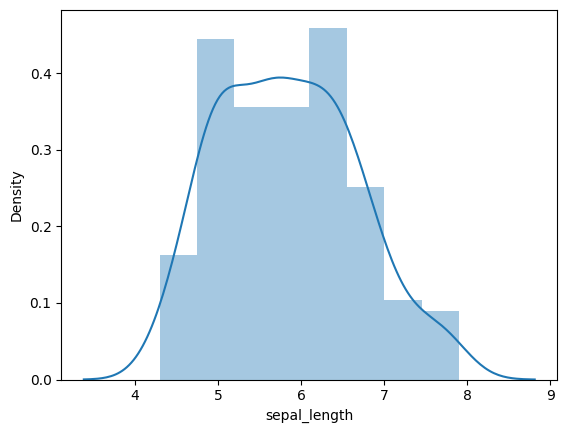

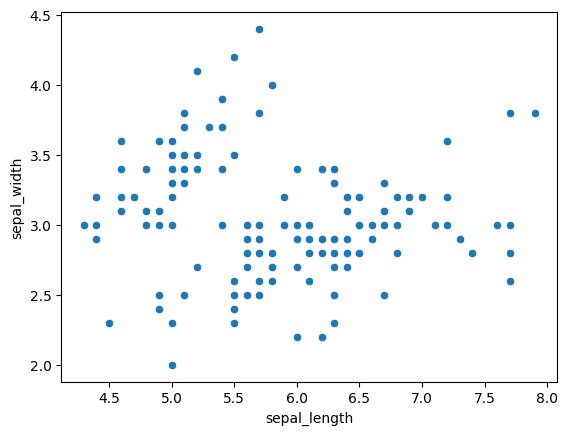

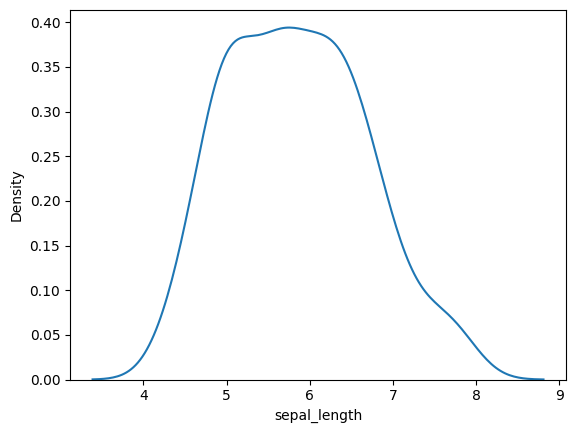

<ipython-input-2-cc09621c5d5e>:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


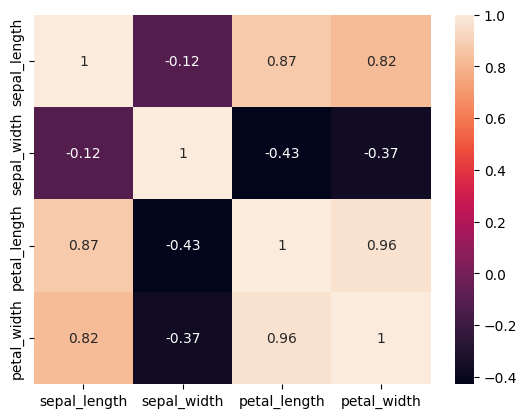

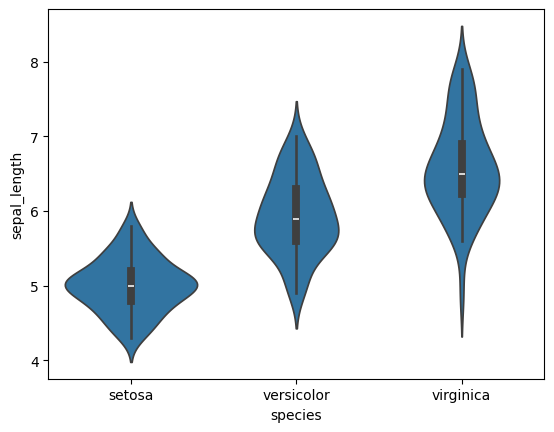

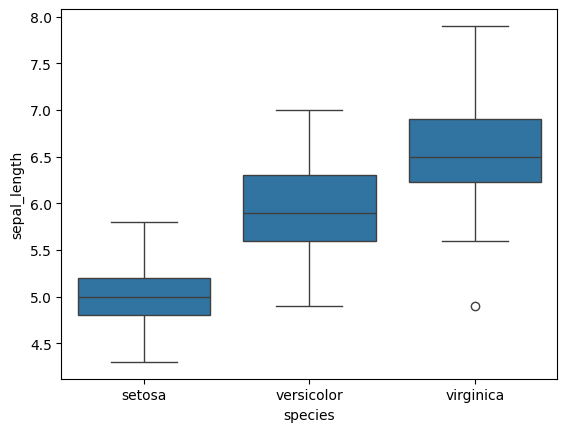

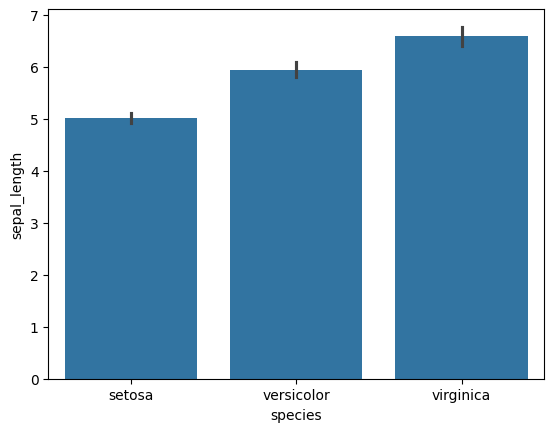

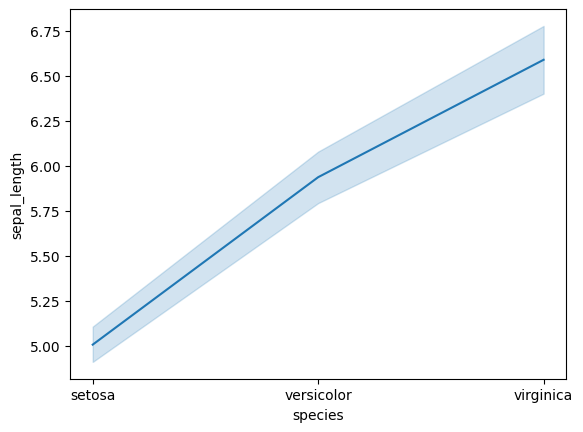

In [2]:
# Seaborn的各種使用案例

import matplotlib.pyplot as plt
# 1. 導入 Seaborn
import seaborn as sns

# 2. 創建數據集
df = sns.load_dataset('iris')

# 3. 繪製直方圖
sns.distplot(df['sepal_length'])
plt.show()

# 4. 繪製散點圖
sns.scatterplot(x='sepal_length', y='sepal_width', data=df)
plt.show()

# 5. 繪製kde圖
sns.kdeplot(df['sepal_length'])
plt.show()

# 6. 繪製熱力圖
sns.heatmap(df.corr(), annot=True)
plt.show()

# 7. 繪製小提琴圖
sns.violinplot(x='species', y='sepal_length', data=df)
plt.show()

# 8. 繪製箱型圖
sns.boxplot(x='species', y='sepal_length', data=df)
plt.show()

# 9. 繪製條形圖
sns.barplot(x='species', y='sepal_length', data=df)
plt.show()

# 10. 繪製線條圖
sns.lineplot(x='species', y='sepal_length', data=df)
plt.show()


更多的詳細教學：[Seaborn 入門](https://www.w3schools.cn/seaborn/seaborn_figure_aesthetic.html)